# TP2 COMPLET


## Imports

In [21]:
import os
import yake
import nltk
nltk.download('stopwords')
import spacy
from collections import defaultdict, Counter
from wordcloud import WordCloud
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from nltk.corpus import stopwords
from IPython.display import Image
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elfabnyl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# extraction des mots clés relatifs à 1970

In [9]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

data_path = "../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt') and "1970" in f]

print(f"Nombre de fichiers pour l'année 1970 : {len(files)}")

Nombre de fichiers pour l'année 1970 : 100


In [ ]:
for f in sorted(files):
    with open(os.path.join(data_path, f), 'r', encoding="utf-8") as file:
        text = file.read()
    
    keywords = kw_extractor.extract_keywords(text)
    kept = [kw for kw, score in keywords if len(kw.split()) == 2]  
    
    print(f"{f} mentions ces mots clés : {', '.join(kept)}...")

# Enrichissement de la liste de stopwords et génération d'un nuage de mots

In [ ]:
sw = set(stopwords.words("french") + ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
 "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", 
 "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", 
 "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", 
 "depuis", "autres", "van", "het", "autre", "jusqu", "ville", "rossel", "dem",
 "un", "une", "le", "la", "et", "ou", "mais", "que", "si", "je", "tu", "il", "elle",
 "on", "nous", "vous", "ils", "elles", "ce", "ça", "y", "en", "a", "de", "pour",
 "par", "avec", "dans", "sur", "à", "du", "des", "au", "aux", "son", "sa", "ses",
 "leur", "leurs", "mon", "ma", "mes", "notre", "nos", "votre", "vos", "très",
 "trop", "assez", "beaucoup", "quelque", "certain", "chaque", "tel", "même",
 "pas", "ne", "ni", "car", "lorsque", "puisque", "comme", "quand", "où",
 "comment", "pourquoi", "donc", "alors", "ainsi", "cependant", "parce que","par ailleur"])

print("Actuellement, les stopwords sont :", sw)



In [12]:
# Ici je charge le contenu de tous les fichiers de 1970
content_list = []
for f in files:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [13]:
# Tout le contenu est mis dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

with open(os.path.join(temp_path, '1970.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [14]:
# ma Fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [15]:
# j'applique la fonction sur le fichier complet de l'année
clean_text(1970, folder=temp_path)

with open(os.path.join(temp_path, '1970_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

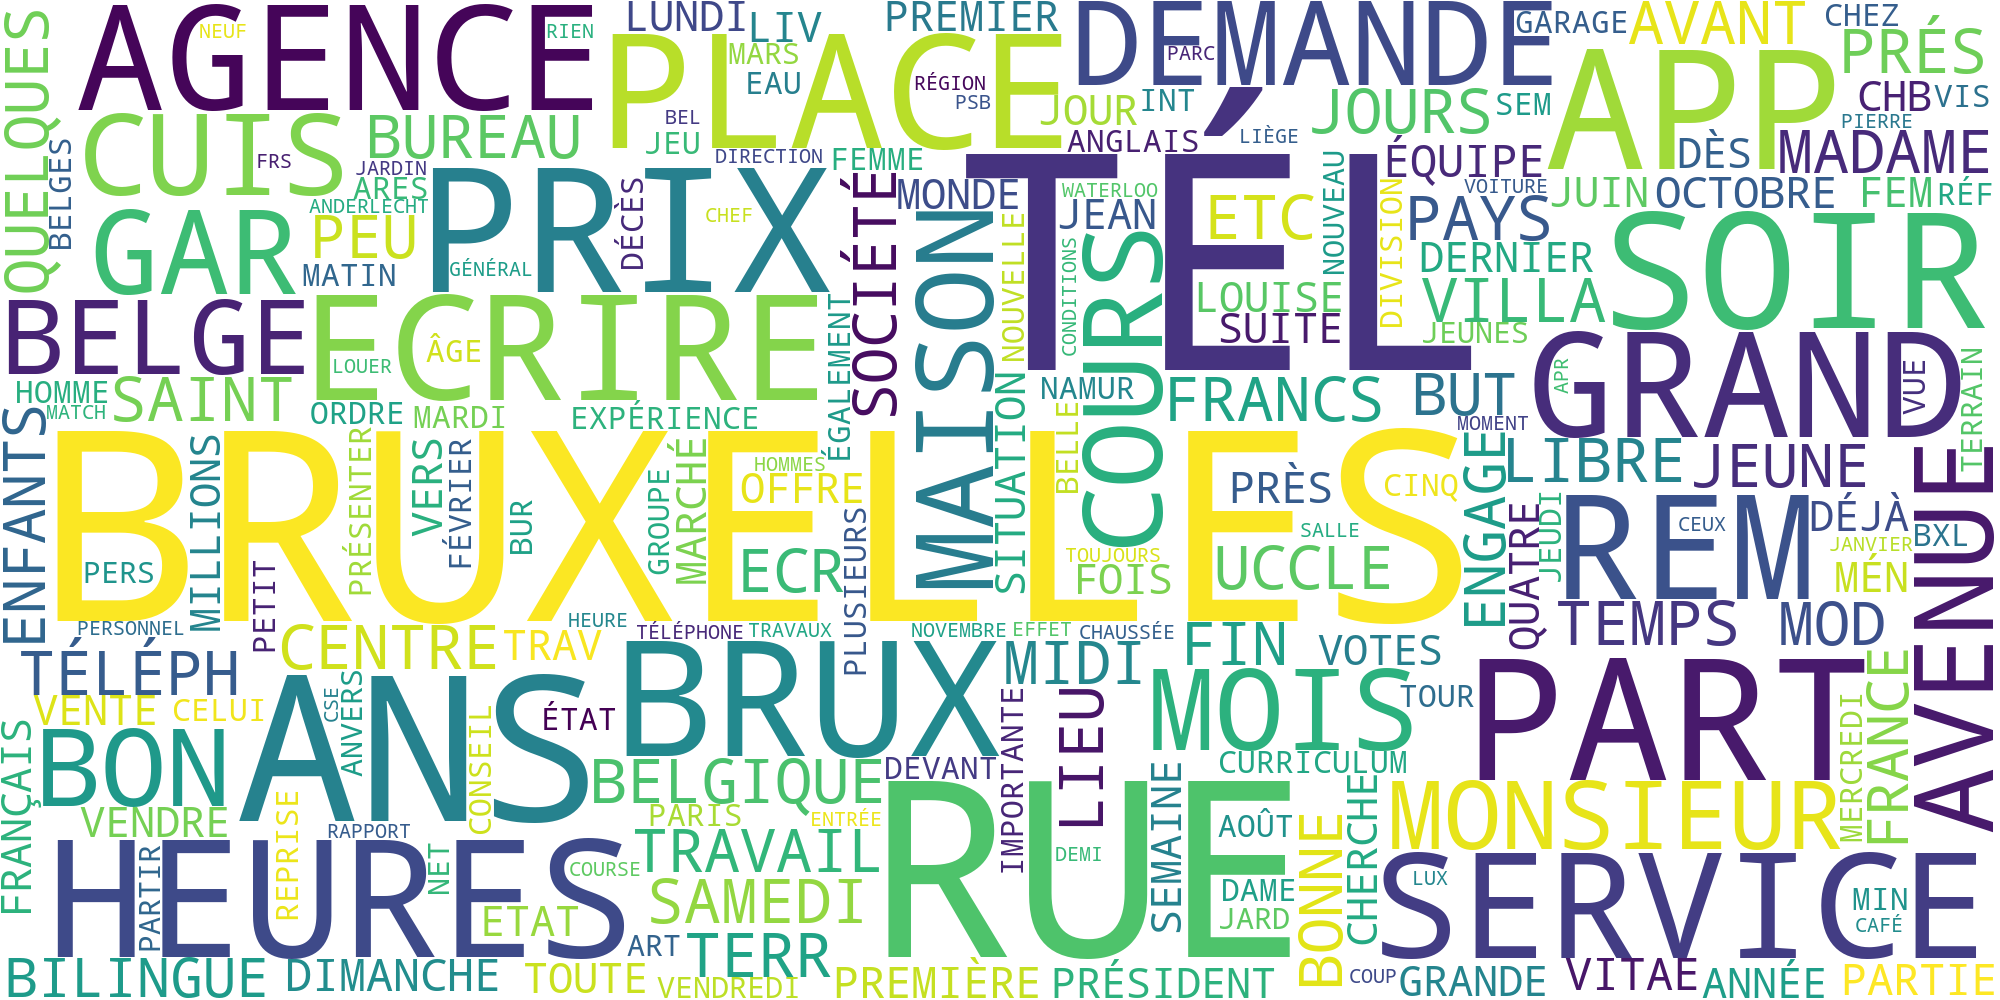

In [23]:
# pour le nuage de mots
frequencies = Counter(after.split())
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, "1970.png"))
Image(filename=os.path.join(temp_path, "1970.png"))

# Analyse de phrases arbitraires avec TextBlob

In [17]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# Liste de phrases arbitraires que j'ai choisi 
phrases = [
    "Le roi Louis-Philippe fut, de tous les souverains du siècle, celui que les assassins politiques menacèrent le plus.",
    "Jeudi prochain, à 8 heures du soir, M. Joseph Martin donnera, à la Société royale belge de géographie, une conférence sur ses voyages dans la Sibérie orientale.",
    "Les bruxellois du centre de la ville étaient auparavant obligés, de partir de 9 heures, de porter leurs dépêches à la gare du Nord ou du Midi",
    "Le plus fort était fait, et l'amoureux capitaine n'avait qu à rejoindre la mariée. Il entra aussi, sans se préoccuper de ce qu'il répondrait si la conciorgc lui demandait oû il allait, mais la conciorgc so tenait ou fond do sa logo et no so dérangea pas pour lo questionner.",
    "La représentation gala donnée vendredi au Théâtre communal par le Cercle symphonique et dramatique a été très brillante, avec une salle comble et des invités en tenue de soirée",
    "Le Roi, accompagné de sa cour, a été chaleureusement accueilli par M. Dustin et M. l'échevin Walravens à son arrivée au foyer du théâtre.",
    "LLes artistes du Cercle ont connu un grand succès, notamment M 11* de Corroy, cantatrice, et M. L. Quecckers, violoniste, qui ont été longuement applaudis.",
    "Au théâtre de l'Alhambra, un gigantesque arbre de Noël sera planté pour le bonheur des enfants lors de la représentation d'Ali-Baba.",
    "Le Roi a salué les artistes du Cercle, en soulignant l'importance de leur contribution à la diffusion de la littérature nationale.",
    "Molenbeek-Saint-Jean. Naissances, déclarations du 21. — Garçons. 2; filles, — Total : 4."
]

In [18]:
# Analyser les phrases et résumer les résultats
results = []

for phrase in phrases:
    blob = tb(phrase)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    
    results.append((phrase, polarity_str, subjectivity_str))



In [ ]:
# Résumé des résultats dans un tableau
df_results = pd.DataFrame(results, columns=["Phrase", "Polarité", "Subjectivité"])
print(df_results)